In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.io.wavfile
import math
import inspect
from scipy.fftpack import fft, fftfreq

# Write your imports here

# Probability and Combinatorics Exercise
## Probabilistic Events. Combinatorics and Counting. Distributions

### Problem 1. Exploring Distribution Parameters
A good idea to visualize and explore the parameters of various distributions is just to plot them.

We can do this in either one of two ways:
1. Draw (generate) many random variables which follow that distribution. Plot their histogram
2. Write the distribution function directly and plot it

Either of these will work but the second approach will give us better looking results. [`scipy.stats`](https://docs.scipy.org/doc/scipy-0.19.1/reference/stats.html) has a lot of built-in distributions that we can use. Each of them has its own use cases.

It's very important that we plot discrete and continuous distributions in different ways. **We must not make discrete distributions look continuous**. That is, discrete distributions are only defined for integer number of trials: $n \in \mathbb{N}$.

Let's plot the binomial and Gaussian distributions.

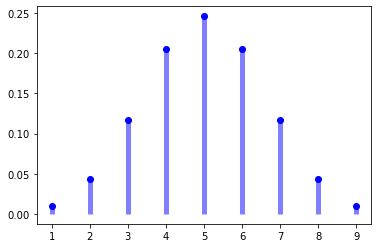

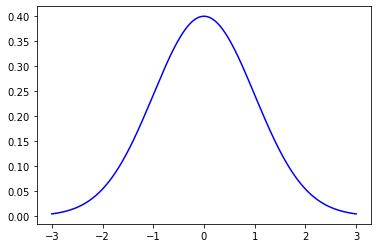

In [6]:
def plot_binomial_distribution(x, n, p):
    """
    Plots the binomial distribution with parameters n and p. The parameter x specifies the values
    where the function is evaluated at
    """
    binomial = scipy.stats.binom.pmf(x, n, p)
    plt.scatter(x, binomial, color = "blue")
    plt.vlines(x, 0, binomial, color = "blue", linewidth = 5, alpha = 0.5)
    plt.show()
    
def plot_gaussian_distribution(mu, sigma, x):
    """
    Plots the Gaussian distribution with parameters mu and sigma. The parameter x specifies 
    the values where the function is evaluated at
    """
    gaussian = scipy.stats.norm.pdf(x, loc = mu, scale = sigma)
    plt.plot(x, gaussian, color = "blue")
    plt.show()
    
x_binomial = np.arange(1, 10)
plot_binomial_distribution(x_binomial, 10, 0.5)

x_gaussian = np.linspace(-3, 3, 1000)
plot_gaussian_distribution(0, 1, x_gaussian)

These look similar. That's with a good reason: the Gaussian distribution is a generalization of the binomial distribution as $n \rightarrow \infty$.

What do these parameters specify exactly? Let's find out. 

Take the binomial distribution. Keep $p = 0.5$ and change $n$. Plot several values of $n$ in the same plot, with different colors. **What values to choose?** Remember that $n$ was the number of experiments, so it should be an integer $\ge 1$.

Now keep $n$ at some reasonable value (a number between 10 and 30 should be good) and change $p$. $p$ is a probability so its values must be between 0 and 1.

What can you conclude? How does the function shape change? When is it symmetrical and when it is not?

Perform the same kind of operations on $\mu$ and $\sigma$ with the Gaussian distribution. What do these parameters represent?

If you get stuck, try to find what the distribution functions should look like on the Internet.

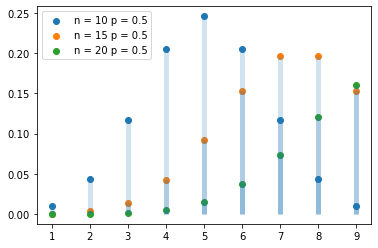

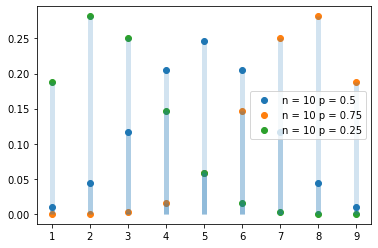

In [7]:
def plot_binomial_distribution(x, n, p):
    """
    Plots the binomial distribution with parameters n and p. The parameter x specifies the values
    where the function is evaluated at
    """
    binomial = scipy.stats.binom.pmf(x, n, p)
    plt.scatter(x, binomial, label = 'n = ' + str(n) + ' p = ' + str(p))
    plt.vlines(x, 0, binomial, linewidth = 5, alpha = 0.2)
    plt.legend()
    
plot_binomial_distribution(x_binomial, 10, 0.5)
plot_binomial_distribution(x_binomial, 15, 0.5)
plot_binomial_distribution(x_binomial, 20, 0.5)
plt.show()

plot_binomial_distribution(x_binomial, 10, 0.5)
plot_binomial_distribution(x_binomial, 10, 0.75)
plot_binomial_distribution(x_binomial, 10, 0.25)
plt.show()

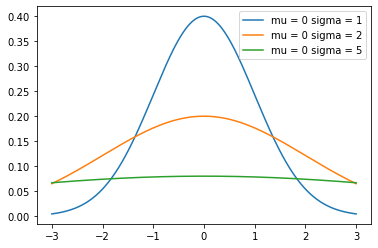

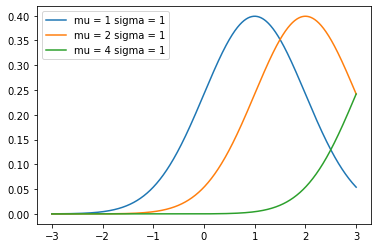

In [8]:
def plot_gaussian_distribution(mu, sigma, x):
    """
    Plots the Gaussian distribution with parameters mu and sigma. The parameter x specifies 
    the values where the function is evaluated at
    """
    gaussian = scipy.stats.norm.pdf(x, loc = mu, scale = sigma)
    plt.plot(x, gaussian, label = 'mu = ' + str(mu) + ' sigma = ' + str(sigma))
    plt.legend()

x_gaussian = np.linspace(-3, 3, 1000)

plot_gaussian_distribution(0, 1, x_gaussian)
plot_gaussian_distribution(0, 2, x_gaussian)
plot_gaussian_distribution(0, 5, x_gaussian)
plt.show()

plot_gaussian_distribution(1, 1, x_gaussian)
plot_gaussian_distribution(2, 1, x_gaussian)
plot_gaussian_distribution(4, 1, x_gaussian)
plt.show()

### Problem 2. Central Limit Theorem
The [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) tells us that no matter what quirky functions we have, their sum is going to be distributed according to the normal distribution. Let's prove this.

Consider the following functions:
$$ f(x) = 1 $$

$$ f(x) = 2x $$

$$ f(x) = 3x^2 $$

$$ f(x) = 4\lvert x - 0,5\rvert $$

$$ f(x) = 2 - 4\lvert x - 0,5\rvert $$

For each of these functions `f`:
1. Generate a big array of, say, 2000 values `x` between 0 and 1
2. Generate the array $f(x)$ and plot $f(x)$. This is just to see how the original function looks
3. Create 1000 experiments like this:
    1. Generate 25 random values $x$ between 0 and 1: `np.random.rand(25)`
    3. Generate $y = f(x)$
    2. Sum all 25 values $y$
    3. Add the sum to the array of sums
4. Plot the distribution of 1000 sums

If you want, you can experiment with the "settings" even more - try changing the number of experiments, number of sums, range of $x$, functions, etc.

What do you get? Can you experiment with a combination of functions? When is the normal distribution a good approximation of the real distribution?

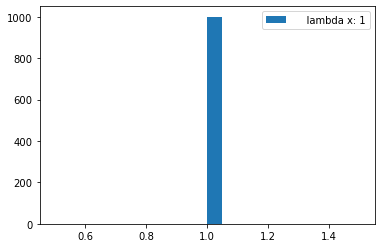

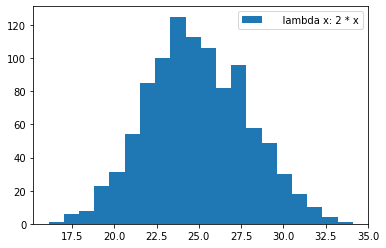

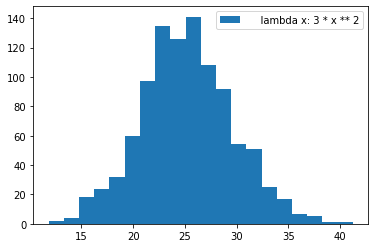

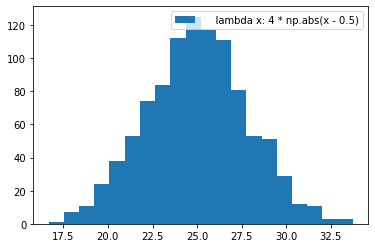

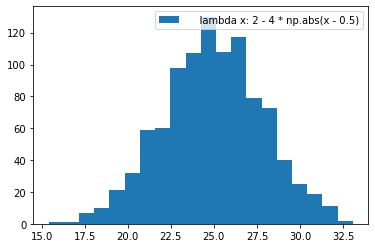

In [16]:
def plot_distributions_for_multiple_functions(functions):
    for function in functions:
        # Create 1000 experiments for the current function
        all_sums = []
        for number in range(1000):
            random_values = np.random.rand(25)
            y = function(random_values)
            y_sum = np.sum(y)
            all_sums.append(y_sum)
        function_as_string = inspect.getsourcelines(function)[0][0][:-2]
        plt.hist(all_sums, bins = 20, label = function_as_string)
        plt.legend()
        plt.show()
    
plot_distributions_for_multiple_functions([
    lambda x: 1,
    lambda x: 2 * x,
    lambda x: 3 * x ** 2,
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5),
])


### Problem 3. Birthday Paradox
How many people do we need to have in a room, so that the probability of two people sharing a birthday is $p(A) > 0,5$?

We suppose no leap years, so a year has 365 days. We could expect that we need about $365/2=182$ people. Well, the truth is a bit different.

#### Solution
**Random variable:** $A$: probability that two people share a birthday
It's sometimes easier to work with the complementary variable: $\bar{A}$ - probability that **no people** share a birthday. 

Let's suppose we have $r$ people in the room. Of course, if $r = 1$, e.g. only one person, the probability is $1$ (there's no one to share a birthday with). If $r >= 365$, the probability must be 1 (by the so-called [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle): if we have 366 people and 365 days, there's at least one day with a pair of people).

Order the people 1 to $r$. Every person's birthday is independent, so that means 365 days for the first, 365 days for the second, and so on: $365^r$ birthday possibilities in total.

We want no duplications of birthdays. The first person has 365 days to choose from, the second has 364, and so on. The $r$th person has $365-r+1$ days to choose from. Total: $365.364.363.\cdots.(365 - r + 1)$

The probability that no people share the same birthday is the fraction of all non-shared birthdays to all possible birthdays:
$$ p(\bar{A})=\frac{365.364.363.\cdots.(365 - r + 1)}{365^r} $$

We're interested in $A$, not $\bar{A}$ and we know that these are complementary, so their probabilities add up to 1
$$p(A) = 1 - p(\bar{A})$$

Write a function which plots the probability of $r$ people sharing a birthday. Remember this is a discrete distribution and should be plotted like so.

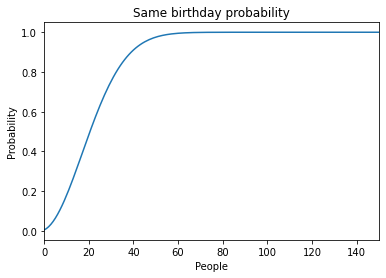

In [6]:
def calculate_birtday_probability(r):
    """
    Returns the probability of r people sharing the same birthday. A year is
    supposed to have 365 days
    """
    # https://en.wikipedia.org/wiki/Birthday_problem
    return 1 - math.e ** (-r ** 2 / 730)

probabilities = [calculate_birtday_probability(r) for r in np.arange(2, 366)]
plt.title('Same birthday probability')
plt.ylabel('Probability')
plt.xlabel('People')
plt.xlim(0, 150)
plt.plot(probabilities)
plt.show()



At how many people do you see a transition from $p(A) < 0,5$ to $p(A) > 0,5$?

**Spoiler alert:** It's 23 people.

Why so few? We're comparing everyone's birthday against everyone else's. We should **NOT** count the number of people, but the number of comparisons. In a room of 23 people, there are 252 total comparisons.

In general, we could get a 50% chance of match using $\sqrt{n}$ people in $n$ days.

### Problem 4. Having Fun with Functions. Fourier Transform
Sometimes we can plot a **parametric curve**. We choose a parameter $t$, in this case $t \in [0; 2\pi]$. We then plot $x$ and $y$ as functions of $t$.

Plot the function below.

In [17]:
t = np.linspace(0, 2 * np.pi, 2000)

In [18]:
x = -(721 * np.sin(t)) / 4 + 196 / 3 * np.sin(2 * t) - 86 / 3 * np.sin(3 * t) - 131 / 2 * np.sin(4 * t) + 477 / 14 * np.sin(5 * t) + 27 * np.sin(6 * t) - 29 / 2 * np.sin(7 * t) + 68 / 5 * np.sin(8 * t) + 1 / 10 * np.sin(9 * t) + 23 / 4 * np.sin(10 * t) - 19 / 2 * np.sin(12 * t) - 85 / 21 * np.sin(13 * t) + 2 / 3 * np.sin(14 * t) + 27 / 5 * np.sin(15 * t) + 7 / 4 * np.sin(16 * t) + 17 / 9 * np.sin(17 * t) - 4 * np.sin(18 * t) - 1 / 2 * np.sin(19 * t) + 1 / 6 * np.sin(20 * t) + 6 / 7 * np.sin(21 * t) - 1 / 8 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 2 * np.sin(24 * t) + 13 / 5 * np.sin(25 * t) + np.sin(26 * t) - 2 * np.sin(27 * t) + 3 / 5 * np.sin(28 * t) - 1 / 5 * np.sin(29 * t) + 1 / 5 * np.sin(30 * t) + (2337 * np.cos(t)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ) / 8 - 43 / 5 * np.cos(2 * t) + 322 / 5 * np.cos(3 * t) - 117 / 5 * np.cos(4 * t) - 26 / 5 * np.cos(5 * t) - 23 / 3 * np.cos(6 * t) + 143 / 4 * np.cos(7 * t) - 11 / 4 * np.cos(8 * t) - 31 / 3 * np.cos(9 * t) - 13 / 4 * np.cos(10 * t) - 9 / 2 * np.cos(11 * t) + 41 / 20 * np.cos(12 * t) + 8 * np.cos(13 * t) + 2 / 3 * np.cos(14 * t) + 6 * np.cos(15 * t) + 17 / 4 * np.cos(16 * t) - 3 / 2 * np.cos(17 * t) - 29 / 10 * np.cos(18 * t) + 11 / 6 * np.cos(19 * t) + 12 / 5 * np.cos(20 * t) + 3 / 2 * np.cos(21 * t) + 11 / 12 * np.cos(22 * t) - 4 / 5 * np.cos(23 * t) + np.cos(24 * t) + 17 / 8 * np.cos(25 * t) - 7 / 2 * np.cos(26 * t) - 5 / 6 * np.cos(27 * t) - 11 / 10 * np.cos(28 * t) + 1 / 2 * np.cos(29 * t) - 1 / 5 * np.cos(30 * t)
y = -(637 * np.sin(t)) / 2 - 188 / 5 * np.sin(2 * t) - 11 / 7 * np.sin(3 * t) - 12 / 5 * np.sin(4 * t) + 11 / 3 * np.sin(5 * t) - 37 / 4 * np.sin(6 * t) + 8 / 3 * np.sin(7 * t) + 65 / 6 * np.sin(8 * t) - 32 / 5 * np.sin(9 * t) - 41 / 4 * np.sin(10 * t) - 38 / 3 * np.sin(11 * t) - 47 / 8 * np.sin(12 * t) + 5 / 4 * np.sin(13 * t) - 41 / 7 * np.sin(14 * t) - 7 / 3 * np.sin(15 * t) - 13 / 7 * np.sin(16 * t) + 17 / 4 * np.sin(17 * t) - 9 / 4 * np.sin(18 * t) + 8 / 9 * np.sin(19 * t) + 3 / 5 * np.sin(20 * t) - 2 / 5 * np.sin(21 * t) + 4 / 3 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 5 * np.sin(24 * t) - 3 / 5 * np.sin(25 * t) + 6 / 5 * np.sin(26 * t) - 1 / 5 * np.sin(27 * t) + 10 / 9 * np.sin(28 * t) + 1 / 3 * np.sin(29 * t) - 3 / 4 * \
    np.sin(30 * t) - (125 * np.cos(t)) / 2 - 521 / 9 * np.cos(2 * t) - 359 / 3 * np.cos(3 * t) + 47 / 3 * np.cos(4 * t) - 33 / 2 * np.cos(5 * t) - 5 / 4 * np.cos(6 * t) + 31 / 8 * np.cos(7 * t) + 9 / 10 * np.cos(8 * t) - 119 / 4 * np.cos(9 * t) - 17 / 2 * np.cos(10 * t) + 22 / 3 * np.cos(11 * t) + 15 / 4 * np.cos(12 * t) - 5 / 2 * np.cos(13 * t) + 19 / 6 * np.cos(14 * t) + \
    7 / 4 * np.cos(15 * t) + 31 / 4 * np.cos(16 * t) - np.cos(17 * t) + 11 / 10 * np.cos(18 * t) - 2 / 3 * np.cos(19 * t) + 13 / 3 * np.cos(20 * t) - 5 / 4 * np.cos(21 * t) + 2 / 3 * np.cos(
        22 * t) + 1 / 4 * np.cos(23 * t) + 5 / 6 * np.cos(24 * t) + 3 / 4 * np.cos(26 * t) - 1 / 2 * np.cos(27 * t) - 1 / 10 * np.cos(28 * t) - 1 / 3 * np.cos(29 * t) - 1 / 19 * np.cos(30 * t)

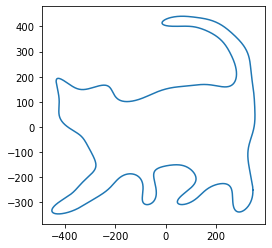

In [19]:
plt.gca().set_aspect("equal")
plt.plot(x, y)
plt.show()

Interesting... 

Have a closer look at the variables `x` and `y`. Note that they're linear combinations of sines and cosines. There's nothing more except sines and cosines, multiplied by coefficients. How are these able to generate the picture? Can we generate any picture?

Yes, we can generate pretty much anything and plot it as a parametric curve. See [this](https://www.wolframalpha.com/input/?i=Schroedinger+cat+bra-ket+curve) for example.

It turns out that **every function**, no matter what, can be represented as a linear combination of sines and cosines. This is the basis of the **Fourier transform**. We'll look at it from two different perspectives: the algebraic one and the practical one.

#### Algebraic perspective: Why does this transform exist? What does it mean?
All functions form a **vector space**. We can see them as vectors. These vectors have infinitely many components which correspond to the infinitely many values $x \in (-\infty; \infty)$. The function space has infinitely many dimensions.

We can find a basis in that space. After we've found a basis, we can express any other function as a linear combination of the basis functions. Any set of infinitely many linearly independent functions will work. But that doesn't help at all...

We know that the best kind of basis is an *orthonormal basis*. This means that all basis vectors are orthogonal and each basis vector has "length" 1. 

Two vectors are orthogonal if their dot product is zero. Similarly, two functions are defined to be orthogonal if their  product is zero, like this:
$$ \int_a^b f(x)g(x)dx = 0 $$

It can be shown that $1$, $\cos(mx)$ and $\sin(nx)$ ($m,n \in \mathbb{N}$) are orthogonal. So, the basis formed by them is orthogonal. They can also be made orthonormal if we divide by their norm. The norm of a function is defined by **functional analysis** - an area of mathematics which treats functions as vectors. We won't go into much more detail now. The norm for $1$ is 1, the norm for the trigonometric functions is $1/\sqrt{2}$.

The takeaway is that ${1, \sqrt{2}\cos(mx), \sqrt{2}\sin(nx),\ m,n \in \mathbb{N}}$ is an orthonormal basis in the function space. 

All periodic functions with period $P$ can be described as linear combinations of these:
$$ f(x) = \frac{a_0}{2} + \sum\left(a_n\cos\left(\frac{2\pi nx}{P}\right)+b_n\sin\left(\frac{2\pi nx}{P}\right)\right) $$

This definition extends to non-periodic functions as well.

#### Engineering perspective
In engineering, the Fourier transform **converts a function of time to a function of frequency**. The function of time is called a **signal**, and the function of frequency is the **spectrum** of that signal. There is a pair of functions - one inverts the other. We have two different options:
1. We can inspect the spectrum
2. We can modify the spectrum

This means that if some operation is very easy to perform in the spectrum we can perform it there using these steps:
1. Create the spectrum from the signal - Fourier transform
2. Perform the operation, e.g. remove a specific frequency
3. Create the corrected signal from the corrected spectrum - inverse Fourier transform

One example usage is in audio processing. An audio signal is a  1D array of **samples** (numbers). Each audio signal has a *bitrate* which tells us how many samples are there in one second. Since audio is a function of time, we can easily get its spectrum.

Some algorithms on images use the spectrum as well. The idea is exactly the same.

Compare this entire process to how we created a **histogram**. Plotting a random variable $X$ as a function of the trial number is essentially plotting a function of time. To get the histogram, we counted how many times we saw each particular value. This is the same as taking the spectrum of the random variable.

### Problem 5. Working with Audio Files. Using the Fourier Transform
In Python, it's easiest to work with `.wav` files. If we have other files, we can convert them first. To load audio files, we can use `scipy.io.wavfile`. Load the `c-note.wav` file. Use only one channel, e.g. the left one.

In [ ]:
bitrate, audio = scipy.io.wavfile.read("c-note.wav")
left_channel = audio[:, 0]
right_channel = audio[:, 1]
plt.plot(left_channel)
plt.xlabel("Sample number") # To get seconds, divide by the bitrate
plt.ylabel("Amplitude")
plt.show()

In [ ]:
left_fft = fft(left_channel)

# fftfreq() returns the frequences in number of cycles per sample. Since we have `bitrate` samples in one second,
# to get the frequencies in Hz, we have to multiply by the bitrate
frequencies = fftfreq(len(left_channel)) * bitrate

plt.plot(frequencies, left_fft)
plt.show()

Note that the signal is symmetric. This is always the case with Fourier transform. We are interested in only half the values (the ones which are $\ge 0$).

In [ ]:
plt.plot(frequencies, left_fft)
plt.xlim((0, 15000))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

We can see that some frequencies have higher intensities than others. Also, they are evenly spaced. This is because the sample is only one note: C4, which has a fundamental frequency of $261,6Hz$. Most other "loud" frequencies are a multiple of the fundamental frequency: these are called **obertones**. There are other frequencies as well. The combination of frequencies which one instrument emphasizes and the ones that it dampens (i.e. makes quiet) determines the specific sound, or **timbre** of that instrument.

In [ ]:
plt.plot(frequencies, left_fft)
plt.xlim((240, 290))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

An interesting application of this is removal of unwanted frequencies. Look at [this video](https://www.youtube.com/watch?v=ATVbnilxIrs) for example. The highly annoying vuvuzela of 2010 World Cup turns out to produce only a single frequency which can be very easily removed from a recording.

Another interesting application of Fourier transform is filters (in audio and images).